In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Data Science/

/content/drive/My Drive/Data Science


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping as ES
from IPython.display import clear_output as cls


import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
batchSize = 32
imageShape = (224, 224)
epochs = 10
channels = 3

In [ ]:
train_dir = "TOMATO_VIRUS/tomato/train/"
val_dir = "TOMATO_VIRUS/tomato/val/"

In [ ]:
class_names = sorted(os.listdir(train_dir))
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
class_dis = [len(os.listdir(train_dir + name)) for name in class_names]
class_dis

[1000, 1000, 1000, 1000, 1000, 1000, 1010, 1000, 1000, 1000]

In [ ]:
fig = px.pie(names=class_names, values=class_dis, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of classes", "x":0.50}})
fig.show()

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255.), validation_split=0.2)
val_gen = ImageDataGenerator(rescale=(1./255.))

In [ ]:
train_ds = train_gen.flow_from_directory(train_dir,target_size=imageShape,batch_size=batchSize, subset='training', class_mode='categorical')
val_ds = train_gen.flow_from_directory(train_dir,target_size=imageShape,batch_size=batchSize, subset='validation', class_mode='categorical')

Found 8008 images belonging to 10 classes.
Found 2002 images belonging to 10 classes.


In [ ]:
test_ds = val_gen.flow_from_directory(val_dir,target_size=imageShape,batch_size=batchSize, class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [ ]:
def plot_images(data, class_names):

    r, c = 3, 4
    imgLen = r*c

    plt.figure(figsize=(20, 15))
    i = 1

    for images, labels in iter(data):


        id = np.random.randint(len(images))
#         img = images[id].numpy().astype('uint8')
        img = tf.expand_dims(images[id], axis=0)
        lab = class_names[np.argmax(labels[id])]

        plt.subplot(r, c, i)
        plt.imshow(img[0])
        plt.title(lab)
        plt.axis('off')
        cls()

        i+=1
        if i > imgLen:
            break
    plt.show()


In [ ]:
#plot_images(train_ds, class_names)

In [ ]:
def get_model():

    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layers in base_model.layers:
        layers.trainable = False

    base_model_output = base_model.output

    x = Flatten()(base_model_output)
    x = Dense(512, activation='relu')(x)
    x = Dense(len(class_names), activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

In [ ]:
model = get_model()

model.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

model.summary()

87910968/87910968 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
history = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=50,
                   steps_per_epoch=len(train_ds),
                   validation_steps=len(val_ds),
                   callbacks=[ES(monitor="val_loss", patience=20)])

Epoch 1/5
251/251 [==============================] - ETA: 0s - loss: 1.6717 - accuracy: 0.5413 

KeyboardInterrupt: ignored

In [ ]:
#model.save('saved_model.h5')

In [ ]:
# Calculate the accuracy and loss
metrics = model.evaluate(val_ds)
metrics

NameError: ignored

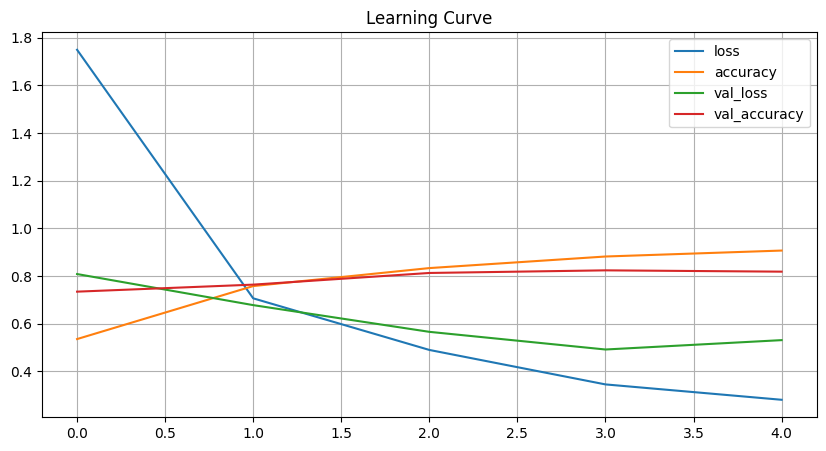

In [ ]:
learningcurve = pd.DataFrame(history.history)
learningcurve.plot(figsize=(10, 5))
plt.title("Learning Curve")
plt.grid()

In [ ]:
class_names = sorted(os.listdir(train_dir))
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image

In [ ]:
loaded_model = tf.keras.models.load_model('saved_model.h5')

In [ ]:
image = 'TOMATO_VIRUS/tomato/val/Tomato___Tomato_mosaic_virus/Tomato___Tomato_mosaic_virus_original_01b32f27-2b9b-4961-805b-8066bf4d90f1___PSU_CG 2417.JPG_d12017e3-aca4-49f1-b01c-8f4e418e6d5e.JPG'
image = Image.open(image)
image = image.resize(imageShape)

1/1 [==============================] - 3s 3s/step


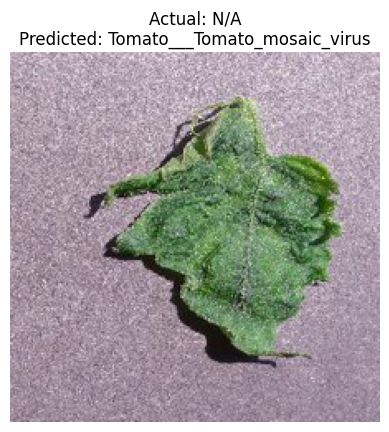

Actual Label: None
Predicted Label: Tomato___Tomato_mosaic_virus


In [ ]:

def predict_single_image(image, class_names, model):
    # Create an ImageDataGenerator for a single image
    data_generator = ImageDataGenerator(rescale=1./255)
    image_generator = data_generator.flow(np.expand_dims(image, axis=0), batch_size=1)

    predicted = loaded_model.predict(image_generator)
    predicted_label = class_names[np.argmax(predicted)]

    plt.imshow(image)
    plt.title(f"Actual: N/A\nPredicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    return None, predicted_label, image



actual_label, predicted_label, predicted_image = predict_single_image(image, class_names, loaded_model)
print(f"Actual Label: {actual_label}")
print(f"Predicted Label: {predicted_label}")


In [ ]:
def predictImages(data, class_names, model):
    num_images = len(data.filenames)
    num_classes = len(class_names)

    num_cols = 5
    num_rows = int(np.ceil(num_images / num_cols))

    plt.figure(figsize=(20, 5 * num_rows))

    i = 1

    for images, labels in data:
        for idx in range(len(images)):
            img = tf.expand_dims(images[idx], axis=0)

            plt.subplot(num_rows, num_cols, i)
            plt.imshow(img[0])

            predicted = model.predict(img)
            predicted_class_index = np.argmax(predicted)

            if predicted_class_index >= num_classes:
                predicted_class_index = num_classes - 1

            predicted = class_names[predicted_class_index]
            actual = class_names[np.argmax(labels[idx])]

            plt.title(f"Actual: {actual}\nPredicted: {predicted}")
            plt.axis('off')

            i += 1
            if i >= num_images:
                break

    plt.tight_layout()
    plt.show()

# Call the function to predict and display all the test images in the val_dir folder
predictImages(test_ds, class_names_train, model)

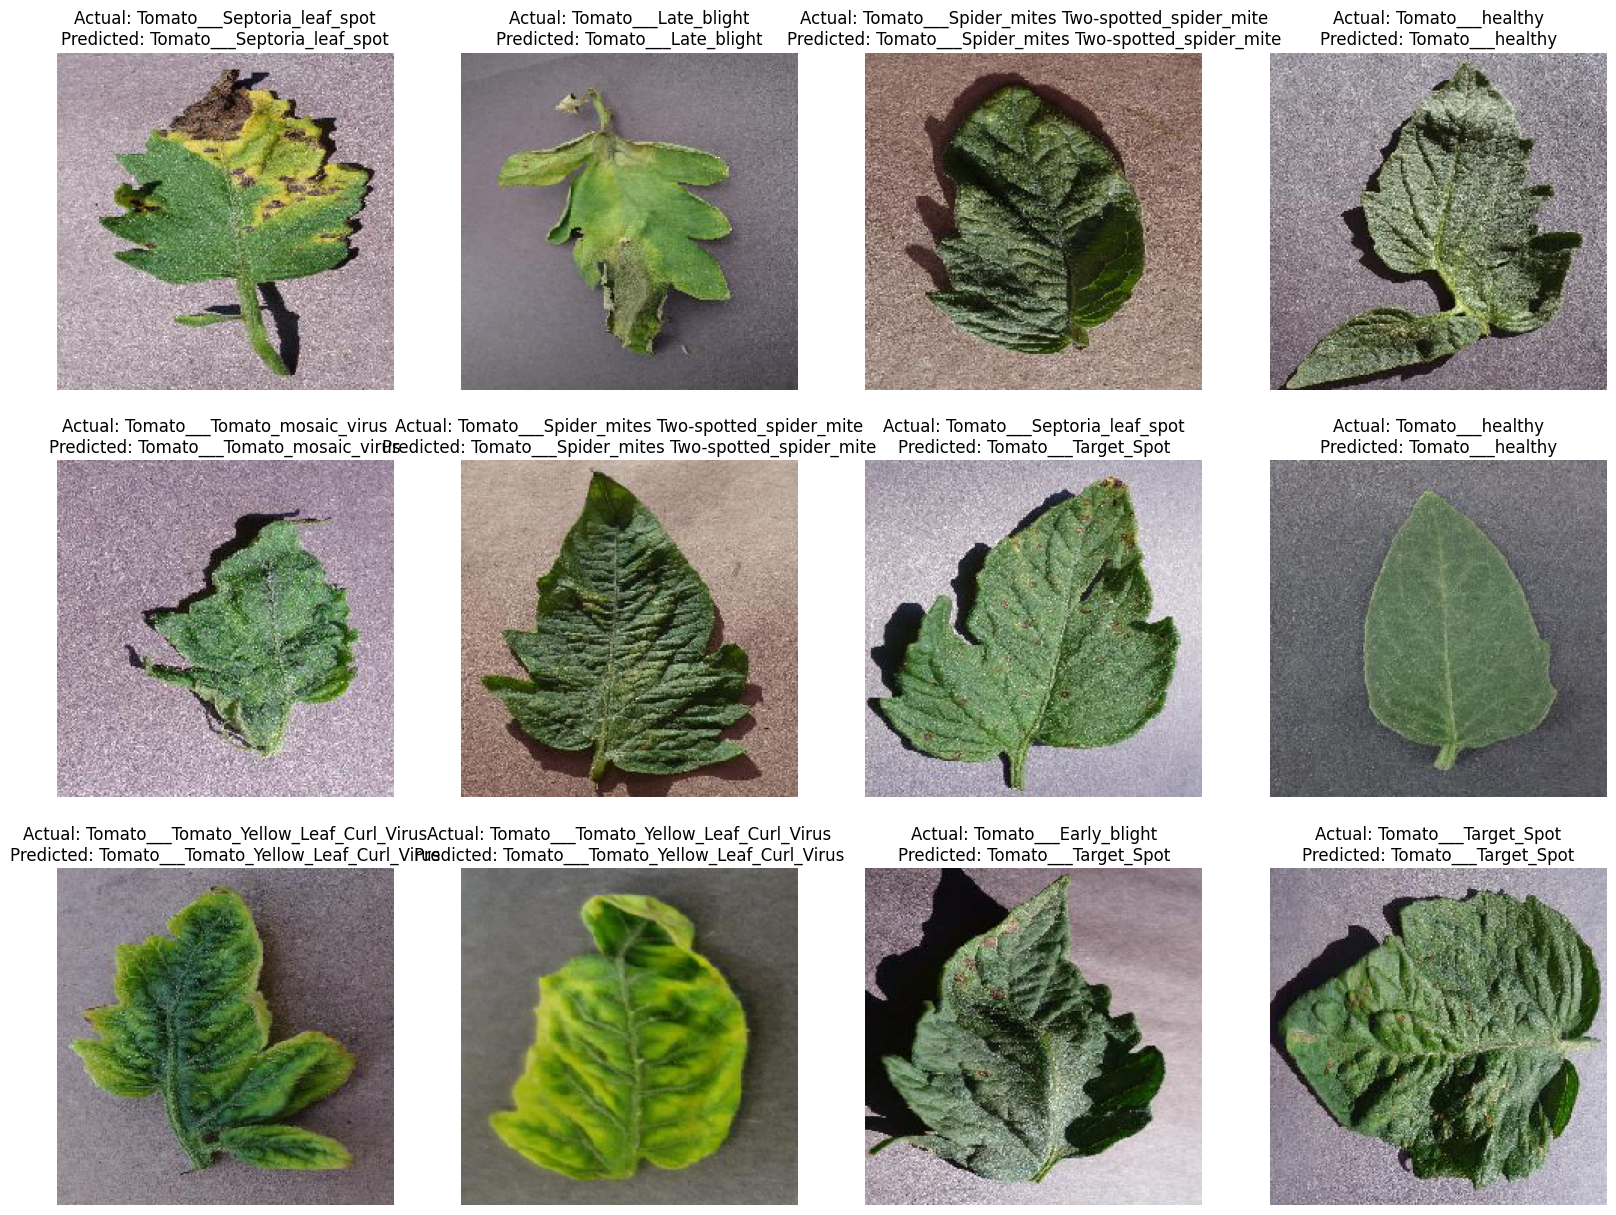

In [ ]:
# Call the function to predict all the test images and display the corresponding true and predicted label
predictImages(test_ds, class_names, model)

Calculate confusion matrix, precision and recall

In [ ]:
y_true_labels = test_ds.classes

In [ ]:
y_pred_probs = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_true_labels, y_pred_labels)

In [ ]:
print(cm)

In [ ]:
# Create a Seaborn heatmap for the confusion matrix
sns.set(font_scale=1.2)  # Adjust the font size if needed
fig, ax = plt.subplots(figsize=(9, 4))  # Adjust the figure size as desired
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            annot_kws={'size': 12}, square=True, linewidths=0.5)

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Customize cell size and spacing
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)



# Display the plot
plt.tight_layout()  # Adjust the layout if needed
plt.show()

Precision and Recall from the confusion matrix

In [ ]:
precision = np.diag(cm)/ np.sum(cm, axis=0)
print(f'Precision: {precision}')

In [ ]:
recall = np.diag(cm)/ np.sum(cm, axis=1)
print(f'Recall: {recall}')